In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [8]:
from desilike.theories.galaxy_clustering import DirectPowerSpectrumTemplate
from desilike.theories.galaxy_clustering import LPTVelocileptorsTracerPowerSpectrumMultipoles, FOLPSTracerPowerSpectrumMultipoles

In [9]:
FOLPS = FOLPSTracerPowerSpectrumMultipoles(template = DirectPowerSpectrumTemplate(z=1.32))

In [6]:
import os

In [2]:
ELG1_data = '/global/cfs/cdirs/desicollab/science/gqc/kp5_eft_comparison/Chains_Abacus_LRG_z0p8/Chains_Velocileptors/DESIY1_tests/DESI_bins/vel_theory/pk/pk_ELG2_z1.32_ell024.txt'

pk_data = np.loadtxt(ELG1_data)
pk_data.shape

(80, 4)

In [3]:
cov_data = '/global/cfs/cdirs/desicollab/science/gqc/kp5_eft_comparison/Chains_Abacus_LRG_z0p8/Chains_Velocileptors/DESIY1_tests/DESI_bins/vel_theory/covariances/cov_ELG2_EZmock_unresc.txt'

covariance = np.loadtxt(cov_data)
covariance.shape

(240, 240)

In [4]:
from new_data_function import new_data

In [6]:
p, new_covariance, klims = new_data(0.02, 0.2, pk_data, covariance, 2)

Dimensiones del vector de datos de multipolos:  (74, 1)
Las dimensiones de la matriz de covarianza son:  (74, 74)


In [10]:
from desilike.observables.galaxy_clustering import TracerPowerSpectrumMultipolesObservable

observable = TracerPowerSpectrumMultipolesObservable(
    data = p, #datos de multipolos para los nuevos limites de k
    covariance = new_covariance, #nueva matriz de covarianza
    klim={0: klims, 2: klims},
    theory = FOLPS) #FOLPS

In [ ]:
observable.plot_covariance_matrix()

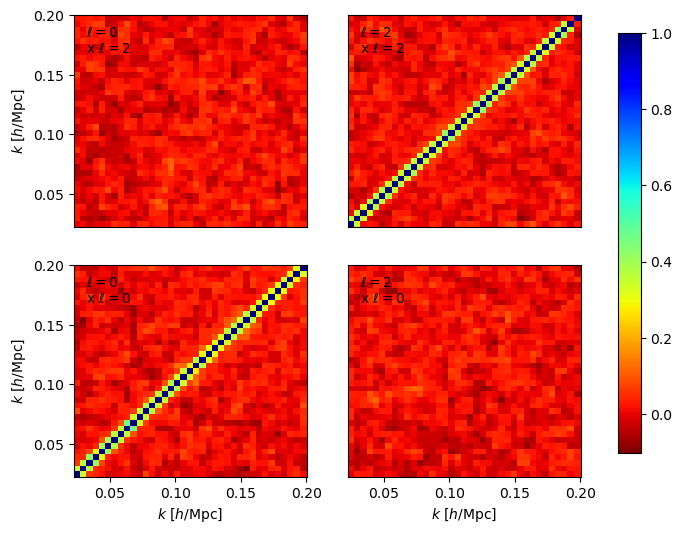

In [9]:
observable.plot_covariance_matrix();

In [10]:
from desilike.likelihoods import ObservablesGaussianLikelihood

likelihood = ObservablesGaussianLikelihood(observables = [observable], covariance = new_covariance)

In [11]:
likelihood.varied_params

N = 128 sampling points
M matrices have been computed
N = 128 sampling points
M matrices have been computed


ParameterCollection(['h', 'omega_cdm', 'omega_b', 'logA', 'b1', 'b2', 'bs', 'alpha0', 'alpha2', 'sn0', 'sn2'])

In [12]:
likelihood.varied_params['alpha0'].update(prior = {'marg':True})
likelihood.varied_params['alpha2'].update(prior = {'marg':True})
likelihood.varied_params['sn0'].update(prior = {'marg':True})
likelihood.varied_params['sn2'].update(prior = {'marg':True})

In [13]:
likelihood.varied_params['b1'].update(value = 2, fixed = True)

In [14]:
likelihood.varied_params

ParameterCollection(['h', 'omega_cdm', 'omega_b', 'logA', 'b2', 'bs', 'alpha0', 'alpha2', 'sn0', 'sn2'])

In [15]:
from desilike import setup_logging
setup_logging()
likelihood()

Array(-36911.03262363, dtype=float64)

In [16]:
likelihood.varied_params

ParameterCollection(['h', 'omega_cdm', 'omega_b', 'logA', 'b2', 'bs', 'alpha0', 'alpha2', 'sn0', 'sn2'])

In [17]:
from desilike.emulators import Emulator, EmulatedCalculator, TaylorEmulatorEngine
#emulamos la teoría con taylor orden 2
emulator = Emulator(FOLPS, engine=TaylorEmulatorEngine(order={'*': 2, 'sn0': 1}))
emulator.set_samples()
emulator.fit()

N = 128 sampling points
M matrices have been computed
N = 128 sampling points
M matrices have been computed
[000014.93] [0/1] 05-03 13:35  Emulator                  INFO     Varied parameters: ['h', 'omega_cdm', 'omega_b', 'logA', 'b1', 'b2', 'bs', 'alpha0', 'alpha2', 'sn0', 'sn2'].
[000014.93] [0/1] 05-03 13:35  Emulator                  INFO     Found varying ['power'] and fixed ['k', 'z', 'ells', 'nd'] outputs.
[000016.62] [0/1] 05-03 13:35  Differentiation           INFO     Varied parameters: ['h', 'omega_cdm', 'omega_b', 'logA', 'b1', 'b2', 'bs', 'alpha0', 'alpha2', 'sn0', 'sn2'].
[000025.39] [0/1] 05-03 13:35  Differentiation           INFO     Using finite-differentiation for parameter h.
[000027.11] [0/1] 05-03 13:35  Differentiation           INFO     Using finite-differentiation for parameter omega_cdm.
[000028.84] [0/1] 05-03 13:35  Differentiation           INFO     Using finite-differentiation for parameter omega_b.
[000030.57] [0/1] 05-03 13:35  Differentiation          

In [18]:
from desilike.samplers import ZeusSampler

In [ ]:
observable.init.update(theory=emulator.to_calculator())
#inicializamos el sampler para la teoría emulada con el crietrio de G_R a 0.15
sampler = ZeusSampler(likelihood, seed=42)
sampler.run(check={'max_eigen_gr': 0.05})

[000092.70] [0/1] 05-03 13:36  ZeusSampler               INFO     Varied parameters: ['h', 'omega_cdm', 'omega_b', 'logA', 'b1', 'b2', 'bs', 'alpha0', 'alpha2', 'sn0', 'sn2'].
[000093.45] [0/1] 05-03 13:36  ZeusSampler               INFO     Successfully vmap input likelihood.
[000093.63] [0/1] 05-03 13:36  ZeusSampler               INFO     Successfully jit input likelihood.
[000093.85] [0/1] 05-03 13:36  TaskManager               INFO     Entering TaskManager with 1 workers.
[000093.85] [0/1] 05-03 13:36  root                      INFO     Initialising ensemble of 28 walkers...
[000134.65] [0/1] 05-03 13:37  ZeusSampler               INFO     Diagnostics:
[000134.69] [0/1] 05-03 13:37  Diagnostics               INFO     - max eigen Gelman-Rubin - 1 is 0.8; not < 0.05.
[000134.73] [0/1] 05-03 13:37  Diagnostics               INFO     - max diag Gelman-Rubin - 1 is 0.14.
[000134.92] [0/1] 05-03 13:37  Diagnostics               INFO     - max diag Gelman-Rubin - 1 at 1.0 sigmas is 0.33.

In [29]:
chain = sampler.chains[0].remove_burnin(0)
print(chain.to_stats(tablefmt='pretty'))

+-----------+---------+---------+---------+--------+-----------------+-----------------+
|           | argmax  |  mean   | median  |  std   | quantile:1sigma | interval:1sigma |
+-----------+---------+---------+---------+--------+-----------------+-----------------+
|     h     |  0.737  |  0.734  |  0.734  | 0.016  |  -0.015/+0.016  |  -0.015/+0.016  |
| omega_cdm | 0.1497  | 0.1483  | 0.1484  | 0.0038 | -0.0032/+0.0034 | -0.0033/+0.0033 |
|  omega_b  | 0.02249 | 0.02233 | 0.02234 | 3.9e-4 | -3.8e-4/+3.8e-4 | -3.7e-4/+3.8e-4 |
|   logA    |  2.602  |  2.611  |  2.607  | 0.048  |  -0.042/+0.040  |  -0.047/+0.034  |
|    b1     |  1.76   |  1.75   |  1.75   |  0.10  |  -0.082/+0.083  |  -0.076/+0.089  |
|    b2     |   0.5   |   0.4   |   0.4   |  1.3   |    -1.3/+1.3    |    -1.3/+1.3    |
|    bs     |   0.7   |   0.4   |   0.2   |  4.1   |    -4.1/+4.2    |    -4.5/+3.8    |
|  alpha0   |   35    |   47    |   45    |   26   |     -25/+24     |     -27/+21     |
|  alpha2   |  -32.4 

In [21]:
from desilike.samples import plotting

In [24]:
%matplotlib inline

Removed no burn in
[018338.36] [0/1] 05-03 18:40  root                      WARNING  fine_bins_2D not large enough for optimal density: h, omega_cdm
[018339.25] [0/1] 05-03 18:40  root                      WARNING  fine_bins_2D not large enough for optimal density: h, omega_b
[018340.12] [0/1] 05-03 18:40  root                      WARNING  fine_bins_2D not large enough for optimal density: h, logA
[018341.00] [0/1] 05-03 18:40  root                      WARNING  fine_bins_2D not large enough for optimal density: omega_cdm, omega_b
[018341.88] [0/1] 05-03 18:40  root                      WARNING  fine_bins_2D not large enough for optimal density: omega_cdm, logA
[018342.72] [0/1] 05-03 18:40  root                      WARNING  fine_bins_2D not large enough for optimal density: omega_b, logA


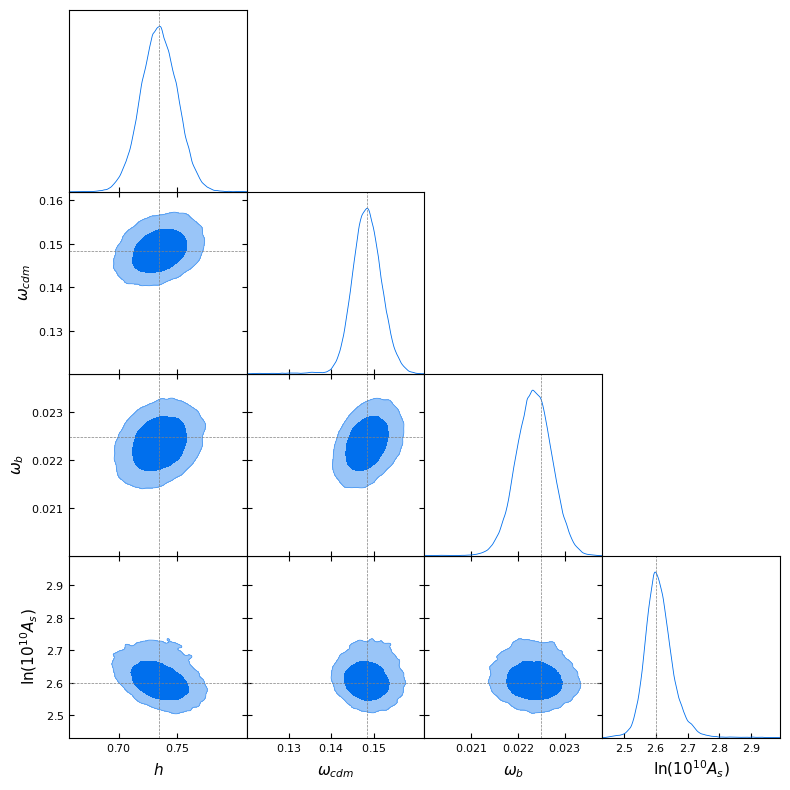

In [35]:
plotting.plot_triangle(chain, filled = True, params = ['h','omega_cdm', 'omega_b', 'logA'], markers = {'h':0.734,'omega_cdm':0.1483,'omega_b':0.02249,'logA':2.6});
plt.savefig('test_ELG_z1_35_FOLPS_marginalization')
plt.show()

Removed no burn in
[019010.74] [0/1] 05-03 18:51  root                      WARNING  fine_bins_2D not large enough for optimal density: h, omega_cdm
[019011.61] [0/1] 05-03 18:51  root                      WARNING  fine_bins_2D not large enough for optimal density: h, omega_b
[019012.48] [0/1] 05-03 18:51  root                      WARNING  fine_bins_2D not large enough for optimal density: h, logA
[019013.32] [0/1] 05-03 18:51  root                      WARNING  fine_bins_2D not large enough for optimal density: h, b1
[019014.17] [0/1] 05-03 18:52  root                      WARNING  fine_bins_2D not large enough for optimal density: h, b2
[019015.02] [0/1] 05-03 18:52  root                      WARNING  fine_bins_2D not large enough for optimal density: h, bs
[019015.89] [0/1] 05-03 18:52  root                      WARNING  fine_bins_2D not large enough for optimal density: h, alpha0
[019016.77] [0/1] 05-03 18:52  root                      WARNING  fine_bins_2D not large enough for op

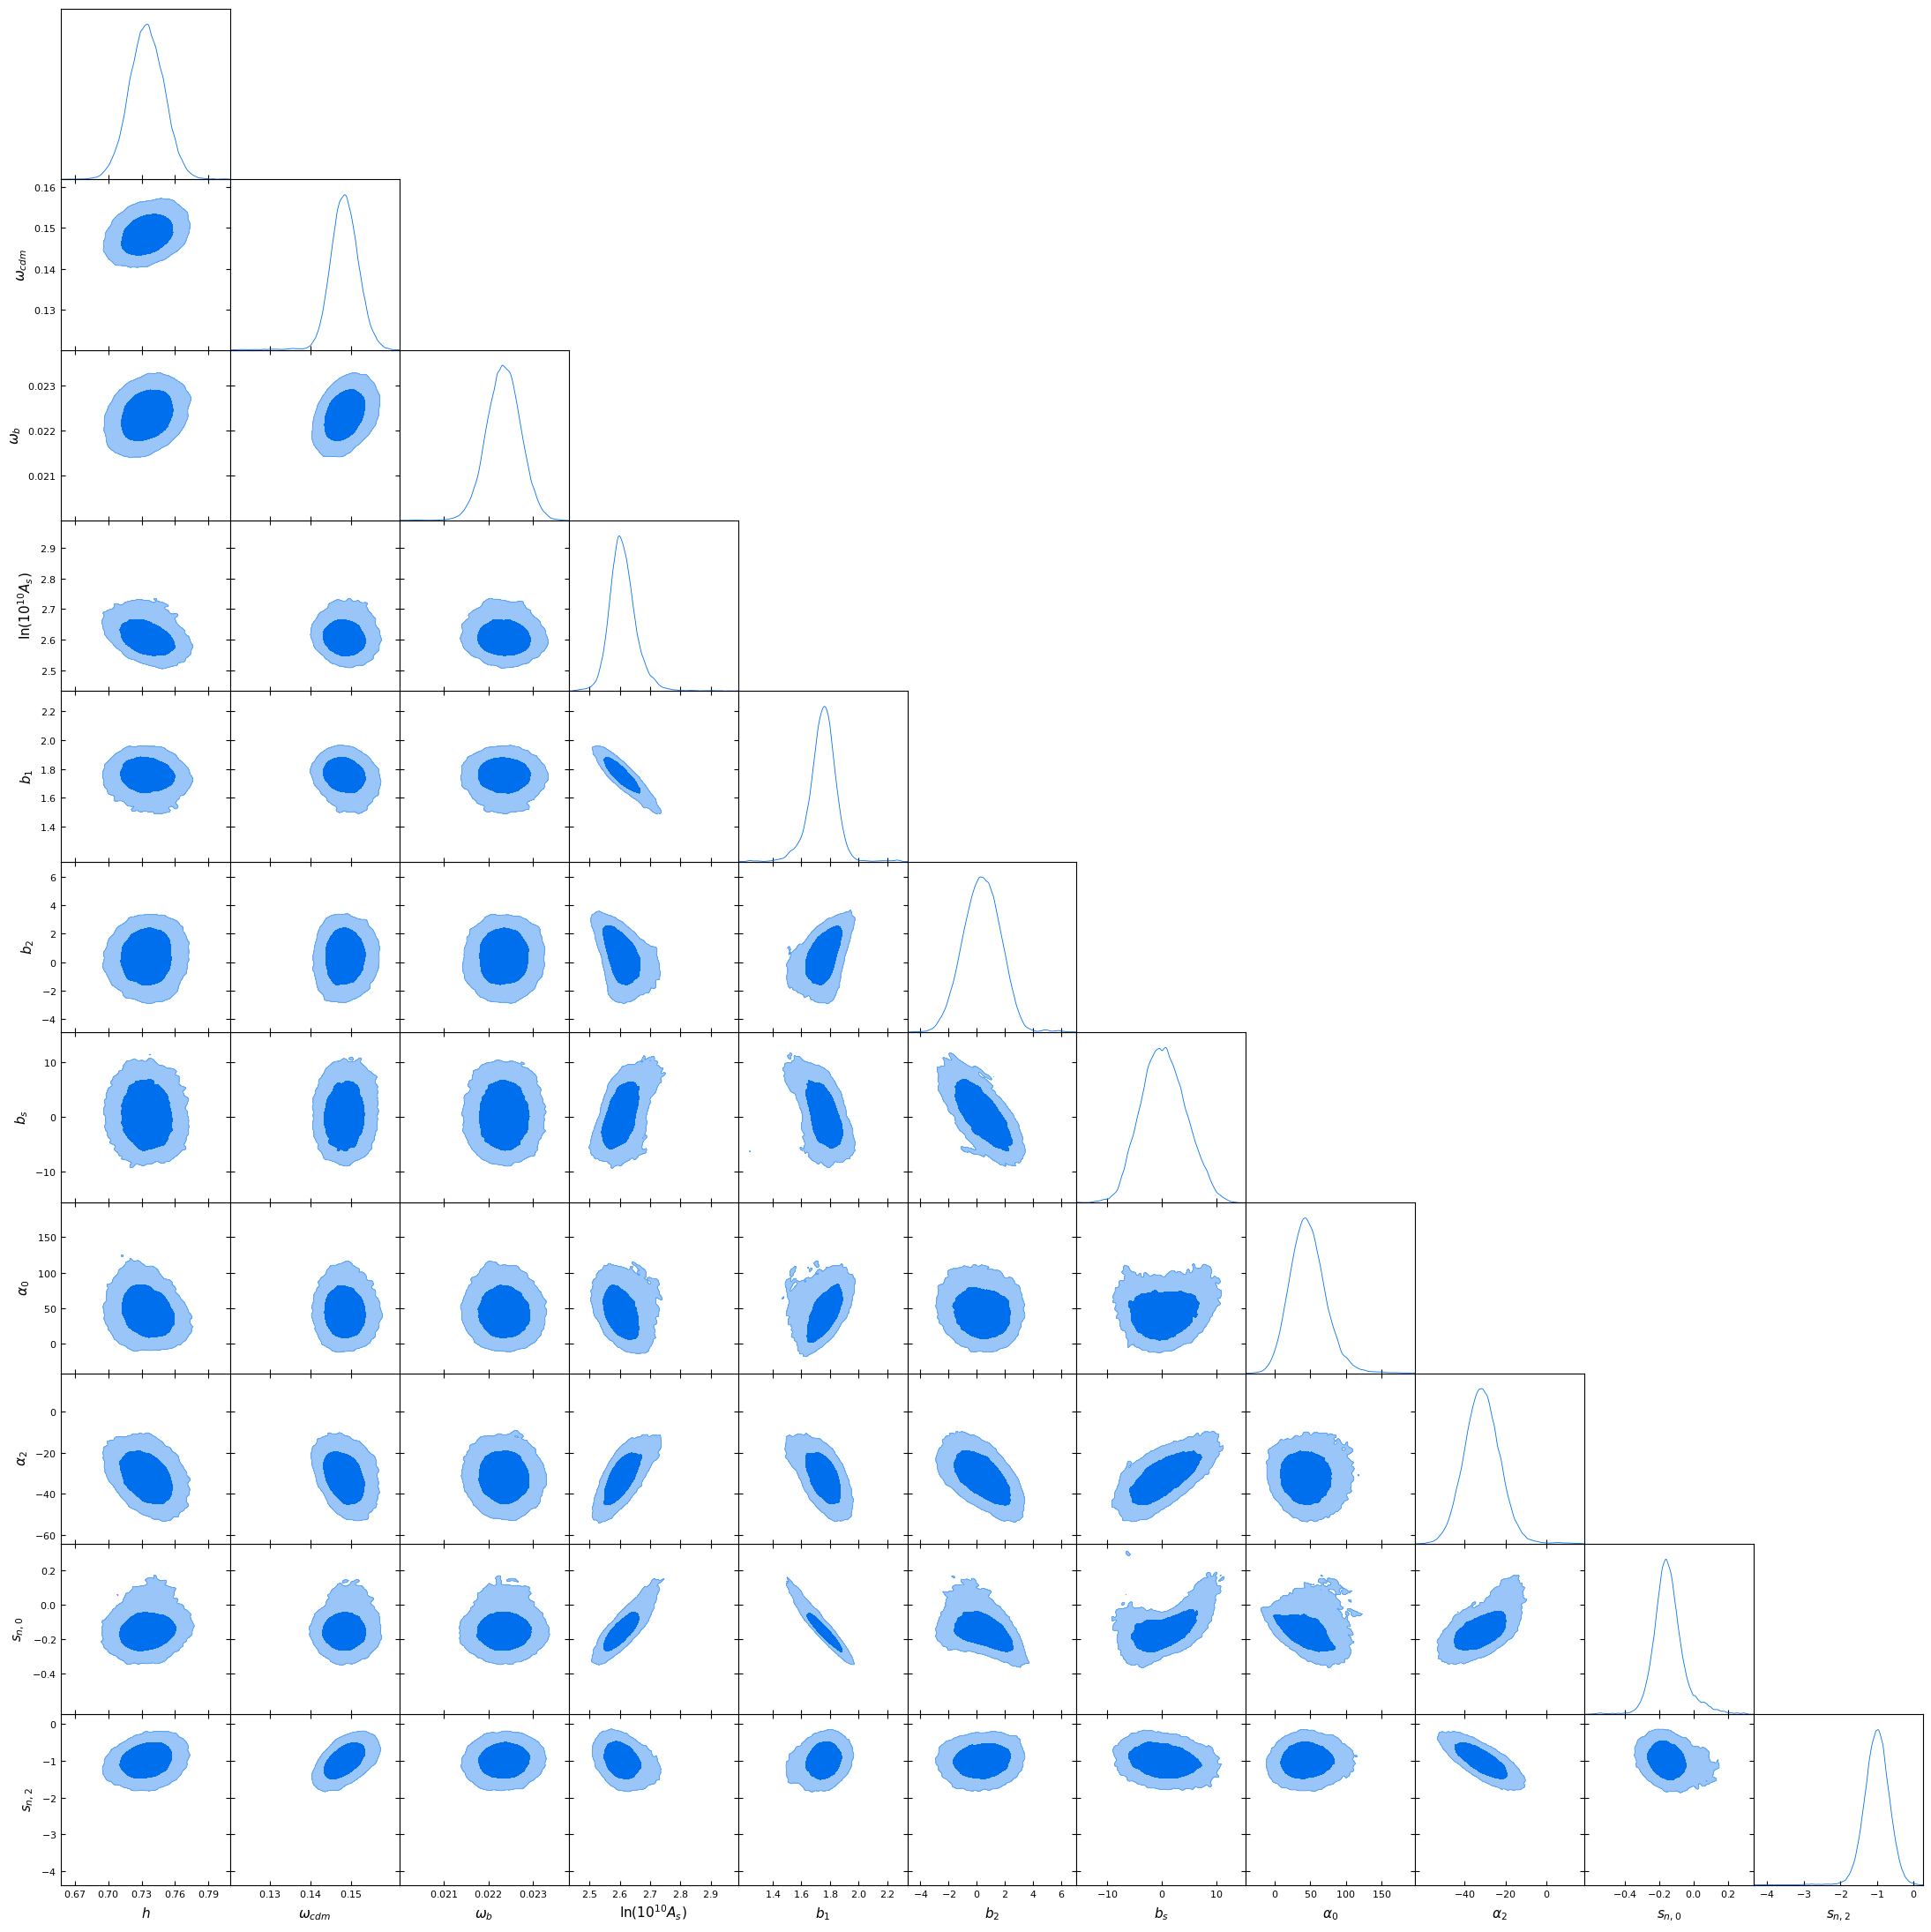

In [41]:
plotting.plot_triangle(chain, filled = True);
plt.savefig('test_ELG_z1_35_FOLPS_marg_allparams')

ValueError: too many values to unpack (expected 1)

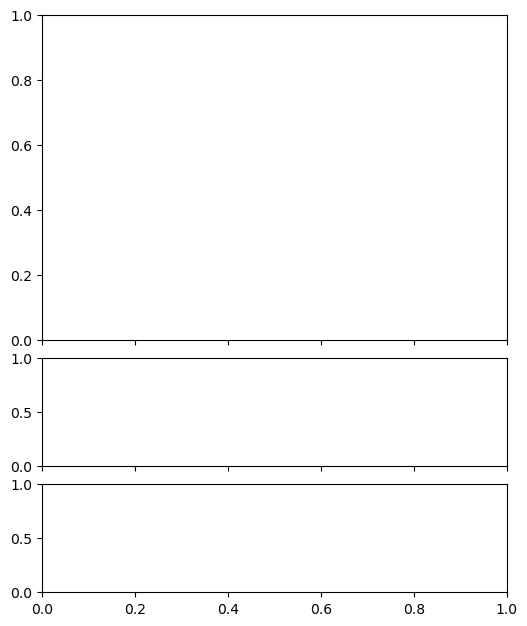

In [42]:
likelihood(**sampler.chains[0].choice(params=likelihood.varied_params))
observable.plot()
plt.show()

In [10]:
pk_data2, covariances_2 = new_data(pk_data[:,0:1][4], pk_data[:,0:1][40], pk_data, covariance, 3)

Dimensiones del vector de datos de multipolos:  (111, 1)
Las dimensiones de la matriz de covarianza son:  (111, 111)


In [13]:
from desilike.observables.galaxy_clustering import TracerPowerSpectrumMultipolesObservable

observable = TracerPowerSpectrumMultipolesObservable(
    data = pk_data2,
    covariance = covariances_2,
    klim={0: [pk_data[:,0:1][4], pk_data[:,0:1][40], 0.0048], 2: [pk_data[:,0:1][4], pk_data[:,0:1][40], 0.0048], 4: [pk_data[:,0:1][4], pk_data[:,0:1][40], 0.0048]},
    theory = FOLPS)

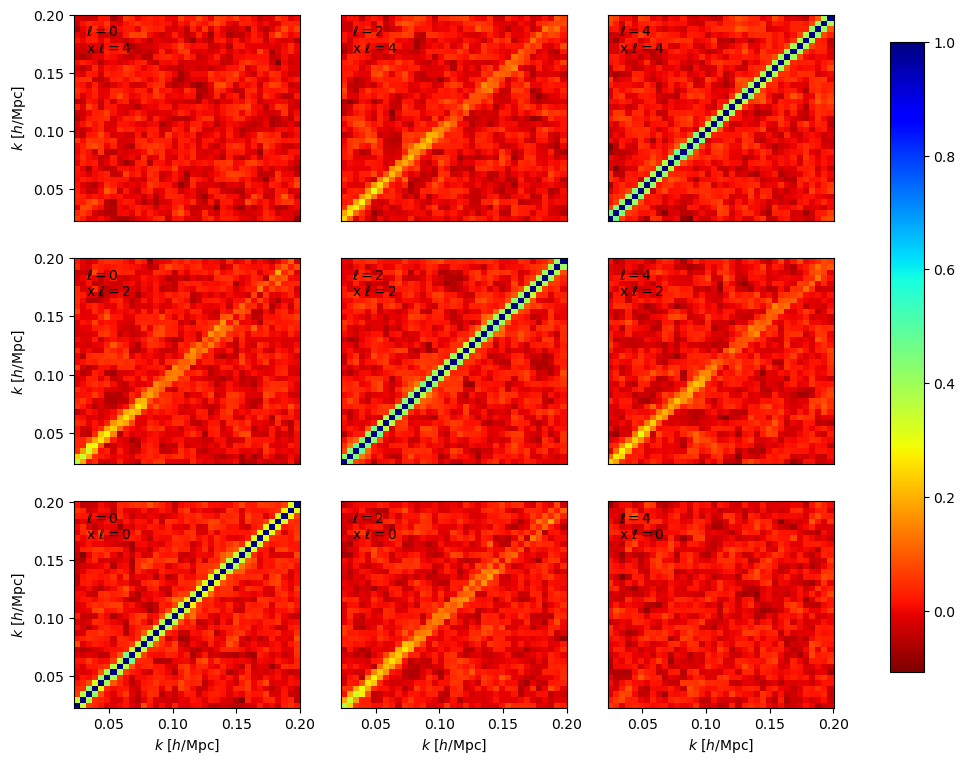

In [14]:
observable.plot_covariance_matrix();

In [15]:
from desilike.likelihoods import ObservablesGaussianLikelihood

likelihood_2 = ObservablesGaussianLikelihood(observables = [observable])

In [18]:
likelihood_2.varied_params

N = 128 sampling points
M matrices have been computed
N = 128 sampling points
M matrices have been computed


ParameterCollection(['h', 'omega_cdm', 'omega_b', 'logA', 'b2', 'bs', 'alpha0', 'alpha2', 'alpha4', 'sn0', 'sn2'])

In [17]:
FOLPS.params['b1'].update(value = 1, fixed = True)

In [21]:
likelihood_2.all_params['alpha0'].update(prior = {'marg':True})
likelihood_2.all_params['alpha2'].update(prior = {'marg':True})
likelihood_2.all_params['sn0'].update(prior = {'marg':True})
likelihood_2.all_params['sn2'].update(prior = {'marg':True})

In [23]:
from desilike import setup_logging
setup_logging()
likelihood_2()

Array(-2402.18878351, dtype=float64)

In [28]:
from desilike.emulators import Emulator, EmulatedCalculator, TaylorEmulatorEngine
#emulamos la teoría con taylor orden 2
emulator = Emulator(FOLPS, engine=TaylorEmulatorEngine(order={'*': 2, 'sn0': 1}))
emulator.set_samples()
emulator.fit()

N = 128 sampling points
M matrices have been computed
N = 128 sampling points
M matrices have been computed
[000085.72] [0/1] 05-06 10:43  Emulator                  INFO     Varied parameters: ['h', 'omega_cdm', 'omega_b', 'logA', 'b2', 'bs', 'alpha0', 'alpha2', 'alpha4', 'sn0', 'sn2'].
[000085.73] [0/1] 05-06 10:43  Emulator                  INFO     Found varying ['power'] and fixed ['k', 'z', 'ells', 'nd'] outputs.
[000087.47] [0/1] 05-06 10:43  Differentiation           INFO     Varied parameters: ['h', 'omega_cdm', 'omega_b', 'logA', 'b2', 'bs', 'alpha0', 'alpha2', 'alpha4', 'sn0', 'sn2'].
[000096.84] [0/1] 05-06 10:43  Differentiation           INFO     Using finite-differentiation for parameter h.
[000098.61] [0/1] 05-06 10:43  Differentiation           INFO     Using finite-differentiation for parameter omega_cdm.
[000100.39] [0/1] 05-06 10:43  Differentiation           INFO     Using finite-differentiation for parameter omega_b.
[000102.46] [0/1] 05-06 10:43  Differentiation  

In [29]:
from desilike.samplers import ZeusSampler

In [ ]:
observable.init.update(theory=emulator.to_calculator())
#inicializamos el sampler para la teoría emulada con el crietrio de G_R a 0.15
sampler = ZeusSampler(likelihood_2, seed=42, save_fn = 'test_ELG_z1_32_FOLPS_v2')
sampler.run(check={'max_eigen_gr': 0.05})

[000236.25] [0/1] 05-06 10:46  ZeusSampler               INFO     Varied parameters: ['h', 'omega_cdm', 'omega_b', 'logA', 'b2', 'bs', 'alpha0', 'alpha2', 'alpha4', 'sn0', 'sn2'].
[000237.45] [0/1] 05-06 10:46  ZeusSampler               INFO     Successfully vmap input likelihood.
[000237.73] [0/1] 05-06 10:46  ZeusSampler               INFO     Successfully jit input likelihood.
[000238.14] [0/1] 05-06 10:46  TaskManager               INFO     Entering TaskManager with 1 workers.
[000238.14] [0/1] 05-06 10:46  root                      INFO     Initialising ensemble of 28 walkers...
[000286.72] [0/1] 05-06 10:47  Chain                     INFO     Saving test_ELG_z1_32_FOLPS_v2.
[000286.73] [0/1] 05-06 10:47  ZeusSampler               INFO     Diagnostics:
[000286.77] [0/1] 05-06 10:47  Diagnostics               INFO     - max eigen Gelman-Rubin - 1 is 0.746; not < 0.05.
[000286.81] [0/1] 05-06 10:47  Diagnostics               INFO     - max diag Gelman-Rubin - 1 is 0.0826.
[000287.00

In [31]:
from desilike.samples import Chain

In [33]:
chain_2 = Chain.load('test_ELG_z1_32_FOLPS_v2.npy')

[017593.79] [0/1] 05-06 15:35  Chain                     INFO     Loading test_ELG_z1_32_FOLPS_v2.npy.


In [44]:
chain_2 = sampler.chains[0].remove_burnin(0.2)
print(chain_2.to_stats(tablefmt='pretty'))

+-----------+---------+---------+---------+--------+-----------------+-----------------+
|           | argmax  |  mean   | median  |  std   | quantile:1sigma | interval:1sigma |
+-----------+---------+---------+---------+--------+-----------------+-----------------+
|     h     |  0.687  |  0.691  |  0.694  | 0.033  |  -0.023/+0.027  |  -0.022/+0.028  |
| omega_cdm | 0.1053  | 0.1041  | 0.1037  | 0.0097 | -0.0096/+0.0095 | -0.0101/+0.0090 |
|  omega_b  | 0.02242 | 0.02236 | 0.02237 | 3.8e-4 | -3.8e-4/+3.8e-4 | -3.7e-4/+3.9e-4 |
|   logA    |  3.43   |  3.41   |  3.43   |  0.19  |  -0.052/+0.093  |  -0.048/+0.097  |
|    b2     |  -0.8   |  -1.0   |  -1.1   |  1.4   |    -1.2/+1.1    |    -1.2/+1.1    |
|    bs     |  11.2   |   2.1   |  -0.1   |  9.7   |    -10./+11     |    -11/+10.     |
|  alpha0   |    5    |   -6    |   -6    |   26   |     -24/+25     |     -23/+26     |
|  alpha2   |   28    |   20.   |   20.   |   21   |     -22/+21     |    -23/+20.     |
|  alpha4   |   -42  

In [36]:
from desilike.samples import plotting

In [38]:
%matplotlib inline

Removed no burn in
[017791.03] [0/1] 05-06 15:38  root                      WARNING  auto bandwidth for h very small or failed (h=0.0005431508687949589,N_eff=1767360.0). Using fallback (h=0.003965710563175473)
[017792.48] [0/1] 05-06 15:38  root                      WARNING  auto bandwidth for logA very small or failed (h=0.0004525430634192961,N_eff=1767360.0). Using fallback (h=0.002545304527607761)
[017793.03] [0/1] 05-06 15:38  root                      WARNING  fine_bins_2D not large enough for optimal density: h, omega_cdm
[017793.63] [0/1] 05-06 15:38  root                      WARNING  fine_bins_2D not large enough for optimal density: h, omega_b
[017794.20] [0/1] 05-06 15:38  root                      WARNING  fine_bins_2D not large enough for optimal density: h, logA
[017794.79] [0/1] 05-06 15:38  root                      WARNING  fine_bins_2D not large enough for optimal density: omega_cdm, omega_b
[017795.35] [0/1] 05-06 15:38  root                      WARNING  fine_bins_2

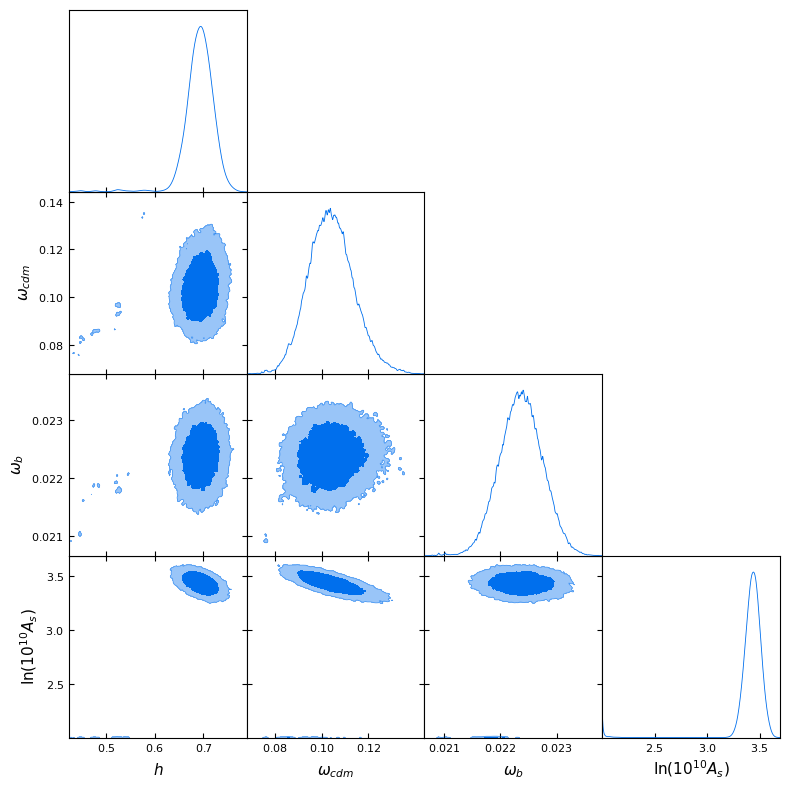

In [45]:
plotting.plot_triangle(chain_2, params = ['h','omega_cdm','omega_b', 'logA'], filled = True);